<a href="https://colab.research.google.com/github/chtourouahm/spam_prediction_ml/blob/main/spam_prediction_ml_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score 

apload the data 

In [ ]:
data_mail=pd.read_csv('/content/mail_data.csv')

have the 5 first row of data

In [ ]:
data_mail.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data_mail.shape

(5572, 2)

In [ ]:
data_mail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data_mail.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
data_mail.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
print('the proba of the messages ham is :',(data_mail['Category'].value_counts()/data_mail.shape[0])[0])
print('the proba of the messages spam is :',(data_mail['Category'].value_counts()/data_mail.shape[0])[1])

the proba of the messages ham is : 0.8659368269921034
the proba of the messages spam is : 0.13406317300789664


replace the ham:1 spam:0

In [ ]:
data_mail=data_mail.replace({'ham':1,'spam':0})

In [ ]:
data_mail.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


spliting the data en target and message

In [ ]:
x=data_mail['Message']
y=data_mail['Category']

In [ ]:
#transform the test data to feature vectors
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')
x_feature=feature_extraction.fit_transform(x)



#transform y to int
y=y.astype('int')



y:the target 
x:messsage

split the data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_feature,y,test_size=0.2,
                                               stratify=y,random_state=0)

In [ ]:
print('shape of train:',x_train.shape)
print('shape of test:',x_test.shape)

shape of train: (4457, 8440)
shape of test: (1115, 8440)


feature extraction

Training the data 

In [ ]:
LR=LogisticRegression()
LR.fit(x_train,y_train)



LogisticRegression()

In [ ]:
#prediction on training data 
x_train_prediction=LR.predict(x_train)
accuracy_train=accuracy_score(x_train_prediction,y_train)
print('the score of acuuracy on training data is:',accuracy_train)





the score of acuuracy on training data is: 0.9661207089970832


In [ ]:
#prediction on testing data
x_test_prediction=LR.predict(x_test)
accuracy_test=accuracy_score(x_test_prediction,y_test)
print('the score of acuuracy on testing data is:',accuracy_test)

the score of acuuracy on testing data is: 0.9605381165919282


In [ ]:
input_data=np.array("Thanks for your subscription to Ringtone UK your mobile will be charged £5/month Please confirm by replying YES or NO. If you reply NO you will not be charged")
input_data=input_data.reshape(-1,1)
input_data=pd.DataFrame(input_data,columns=['input'])

real='spam'
input_data_extraction=feature_extraction.transform(input_data)

prediction=LR.predict(input_data_extraction)
if prediction==0:
    print('spam mail be carefull')
else:
    print("ham mail don't worry")

ham mail don't worry


In [ ]:
input_data.shape

(1, 1)

In [ ]:
from sklearn.decomposition import TruncatedSVD 

In [ ]:
reducer=TruncatedSVD (n_components=3)
x_reduced=reducer.fit_transform(x_train)
x_reduced.shape


(4457, 3)

In [ ]:
y=y.reshape(-1,1)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

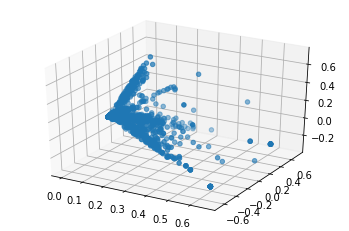

In [ ]:
ax=plt.axes(projection='3d')
ax.scatter(x_reduced[:,0],x_reduced[:,1],x_reduced[:,2])
